## PLANTEAMIENTO DEL PROBLEMA

El uso de la energía eléctrica es fundamental para el desarrollo social, económico e industrial. Por esta razón, garantizar un servicio estable, continuo y de calidad se vuelve prioritario tanto para las empresas distribuidoras como para los usuarios finales. En este contexto, la medición precisa de variables eléctricas clave permite no solo cuantificar el consumo, sino también evaluar la calidad del suministro.

Para lograrlo, la industria eléctrica ha incorporado tecnologías como el Internet de las Cosas (IoT), que facilita la transmisión en tiempo real de información desde sensores instalados en transformadores y equipos críticos. Esta información se convierte en un insumo estratégico para la toma de decisiones operativas y económicas, tales como mantenimiento predictivo, planificación de infraestructura y mitigación de pérdidas.

En este proyecto, se analiza un conjunto de datos reales proporcionado por una distribuidora eléctrica de El Salvador, el cual corresponde a mediciones recopiladas desde transformadores ubicados en una zona residencial. El objetivo inicial es organizar, depurar y visualizar las variables eléctricas más relevantes, con el fin de hacer la información más accesible y útil para la gestión técnica.
A partir de este análisis, se plantea responder las siguientes preguntas clave:

1.	¿Cuántas variaciones de voltaje fuera del rango nominal se produjeron durante el primer trimestre de 2025?

2.	¿Cuántas interrupciones en el servicio afectaron a los residentes debido a caídas de voltaje significativas?

3.	¿Los transformadores están bien dimensionados en relación con su carga real?


In [24]:
import pandas as pd
# Cargar datos desde GitHub
github_url = "https://raw.githubusercontent.com/eagz93/PythonMaestria/refs/heads/main/DATOS_EQUIPO_4_PCD.csv"
# Crea el modelo de datos 'df'
df = pd.read_csv(github_url)
df.head()


,ID,Serial Number,Node ID,subpanel_id,imei,Latitude,Longitude,Node Status,service_center,substation,...,kVA Rating,tln,transformer_type,transformerSerialNum,kVA,voltageImbalance,pt_ratio,ct_ratio,transformer_alimentador_835,ambientTemperature
0,7,2423UTMF04187,T63253,835,862754053334131,13.745225,-89.36063,1,NaN,NaN,...,50,T63253,1P Pad,NaN,10.61,NaN,NaN,NaN,NaN,NaN
1,7,2423UTMF04187,T63253,835,862754053334131,13.745225,-89.36063,1,NaN,NaN,...,50,T63253,1P Pad,NaN,11.96,NaN,NaN,NaN,NaN,NaN
2,7,2423UTMF04187,T63253,835,862754053334131,13.745225,-89.36063,1,NaN,NaN,...,50,T63253,1P Pad,NaN,10.11,NaN,NaN,NaN,NaN,NaN
3,7,2423UTMF04187,T63253,835,862754053334131,13.745225,-89.36063,1,NaN,NaN,...,50,T63253,1P Pad,NaN,10.13,NaN,NaN,NaN,NaN,NaN
4,7,2423UTMF04187,T63253,835,862754053334131,13.745225,-89.36063,1,NaN,NaN,...,50,T63253,1P Pad,NaN,11.50,NaN,NaN,NaN,NaN,NaN


In [9]:
#quitan todas las columnas con valores faltantes
df = df.dropna(axis=1, how='all')

In [10]:
   # Dejando solo relevantes
df = df[[
    "ID", "Latitude", "Longitude", "Date",
    "X1 Voltage", "X3 Voltage",
    "X1 Current", "X3 Current", "primaryPhase1CurrentAvg", "primaryPhase3CurrentAvg",
    "X3 Power (kW)", "X1 Power (kW)",
    "line1frequencyPeriodAverage", "line3frequencyPeriodAverage",
    "X1 Energy (kWh)", "X3 Energy (kWh)","Power X1 THD","Power X3 THD","kVA","kVA Rating"
    ]]

In [11]:
# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [12]:
# Imprimen tipos de datos
print(df.dtypes)

ID                                      int64
Latitude                              float64
Longitude                             float64
Date                           datetime64[ns]
X1 Voltage                            float64
X3 Voltage                            float64
X1 Current                            float64
X3 Current                            float64
primaryPhase1CurrentAvg               float64
primaryPhase3CurrentAvg               float64
X3 Power (kW)                         float64
X1 Power (kW)                         float64
line1frequencyPeriodAverage           float64
line3frequencyPeriodAverage           float64
X1 Energy (kWh)                       float64
X3 Energy (kWh)                       float64
Power X1 THD                          float64
Power X3 THD                          float64
kVA                                   float64
kVA Rating                              int64
dtype: object


In [13]:
#generan descripciones de los datos
df.describe(include='all')

,ID,Latitude,Longitude,Date,X1 Voltage,X3 Voltage,X1 Current,X3 Current,primaryPhase1CurrentAvg,primaryPhase3CurrentAvg,X3 Power (kW),X1 Power (kW),line1frequencyPeriodAverage,line3frequencyPeriodAverage,X1 Energy (kWh),X3 Energy (kWh),Power X1 THD,Power X3 THD,kVA,kVA Rating
count,191068.000000,191068.000000,191068.000000,191068,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000
mean,6.680517,13.746207,-89.361608,2025-02-14 21:15:19.560574976,124.133603,124.299367,63.299490,60.026977,7.697002,7.286667,7700.835833,7290.324858,60.008098,60.008109,9887.192031,9252.872620,0.803351,0.816039,15.319663,83.366131
min,3.000000,13.745225,-89.362623,2025-01-01 00:00:09,0.200000,0.200000,0.300000,0.200000,0.000000,0.000000,0.000000,0.000000,59.200000,59.000000,2060.900000,1880.000000,0.000000,0.000000,0.000000,50.000000
25%,3.000000,13.745225,-89.362623,2025-01-23 07:17:46.750000128,123.300000,123.400000,45.900000,40.200000,5.540000,4.840000,5537.000000,4837.000000,60.000000,60.000000,5954.500000,5626.275000,0.453000,0.460000,10.850000,50.000000
50%,7.000000,13.746678,-89.361575,2025-02-14 20:44:47,124.200000,124.400000,60.200000,54.700000,7.300000,6.640000,7302.000000,6643.000000,60.000000,60.000000,9158.700000,8560.700000,0.857000,0.868000,14.350000,100.000000
75%,10.000000,13.746715,-89.360630,2025-03-09 09:07:41.750000128,125.100000,125.300000,78.000000,75.800000,9.510000,9.240000,9514.000000,9251.000000,60.000000,60.000000,13141.775000,12071.200000,1.153000,1.170000,19.000000,100.000000
max,10.000000,13.746715,-89.360630,2025-03-31 23:59:15,129.400000,129.600000,178.200000,200.300000,22.000000,24.890000,22068.000000,25041.000000,60.300000,60.300000,22082.000000,20503.100000,4.545000,3.927000,47.230000,100.000000
std,2.867983,0.000694,0.000813,NaN,1.427252,1.422632,22.875578,25.491209,2.833006,3.163481,2837.607328,3166.564466,0.027720,0.027769,4848.894528,4590.114264,0.419575,0.429567,5.780882,23.558666


## Descripción de las Variables del Dataset

El dataset contiene 191,068 registros y 19 columnas. A continuación, se describen las principales variables:

- **ID**: Identificador único del registro.
- **Latitude** y **Longitude**: Coordenadas geográficas donde se tomaron las mediciones.
- **Date**: Fecha y hora de la medición, convertida al formato datetime.
- **X1 Voltage** y **X3 Voltage**: Voltajes medidos en las fases X1 y X3.
- **X1 Current** y **X3 Current**: Corrientes medidas en las fases X1 y X3.
- **primaryPhase1CurrentAvg** y **primaryPhase3CurrentAvg**: Promedio de corriente en las fases primarias 1 y 3.
- **X1 Power (kW)** y **X3 Power (kW)**: Potencia medida en las fases X1 y X3 en kilovatios.
- **line1frequencyPeriodAverage** y **line3frequencyPeriodAverage**: Promedio del período de frecuencia en las líneas 1 y 3.
- **X1 Energy (kWh)** y **X3 Energy (kWh)**: Energía acumulada en las fases X1 y X3 en kilovatios-hora.
- **Power X1 THD** y **Power X3 THD**: Distorsión armónica total de la potencia en las fases X1 y X3.
- **kVA**: Potencia aparente medida en kilovoltio-amperios.

# Análisis Descriptivo y Visualización
En esta sección, realizaremos un análisis descriptivo de los datos limpios y crearemos visualizaciones para entender mejor las distribuciones y relaciones entre las variables.

In [14]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Configuración general para los gráficos
sns.set(style="whitegrid")

## Histogramas de Variables Numéricas
Visualizamos la distribución de algunas variables clave como Voltaje, Corriente y Potencia.

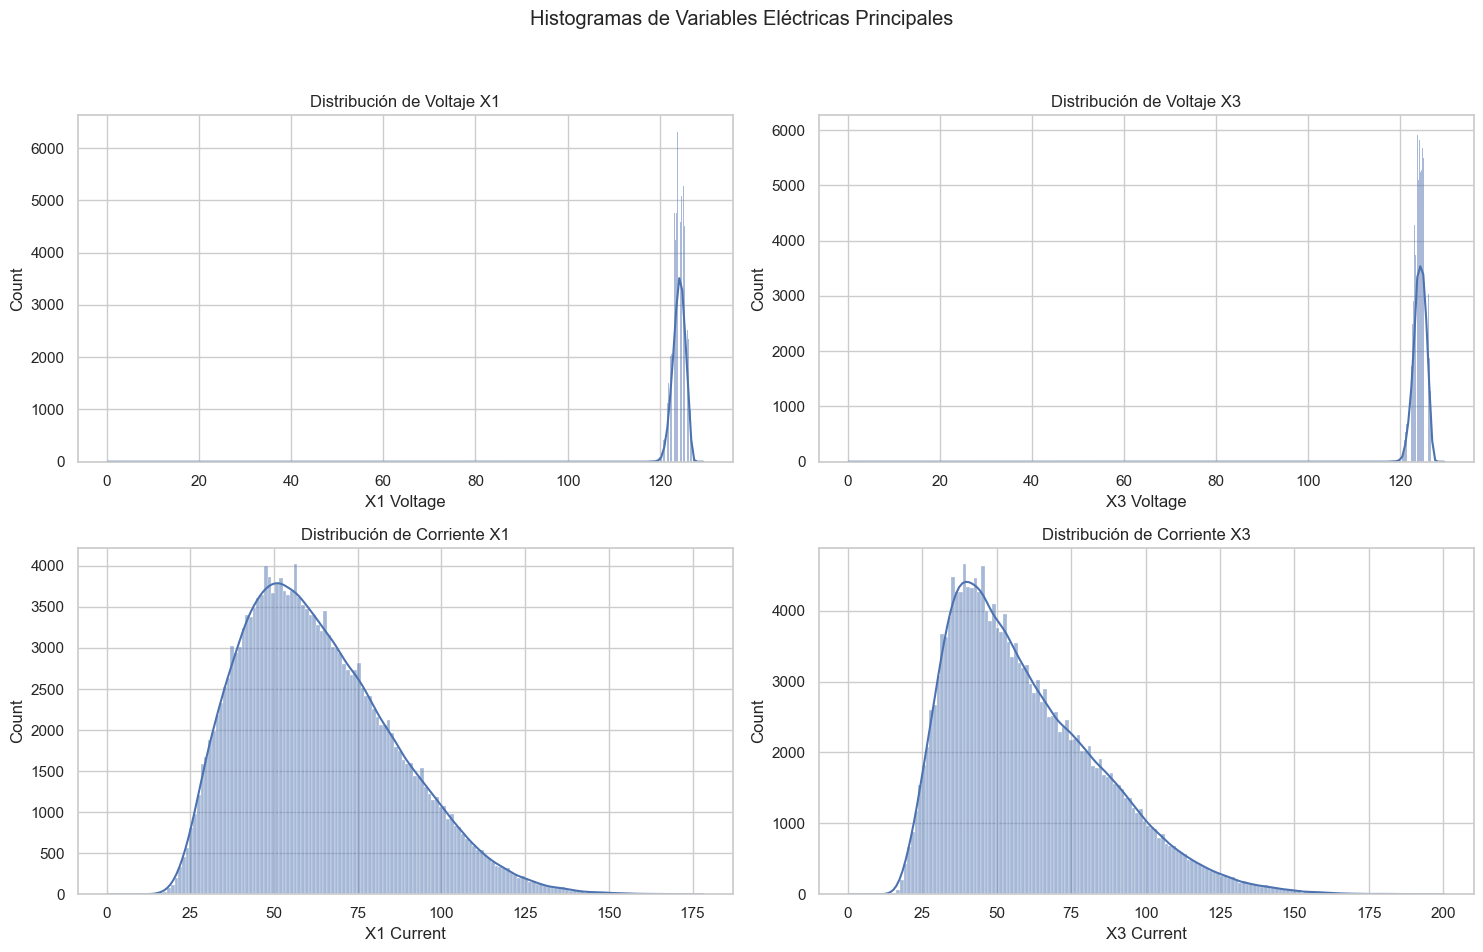

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Histogramas de Variables Eléctricas Principales')

sns.histplot(df['X1 Voltage'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Voltaje X1')

sns.histplot(df['X3 Voltage'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Voltaje X3')

sns.histplot(df['X1 Current'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Corriente X1')

sns.histplot(df['X3 Current'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Corriente X3')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

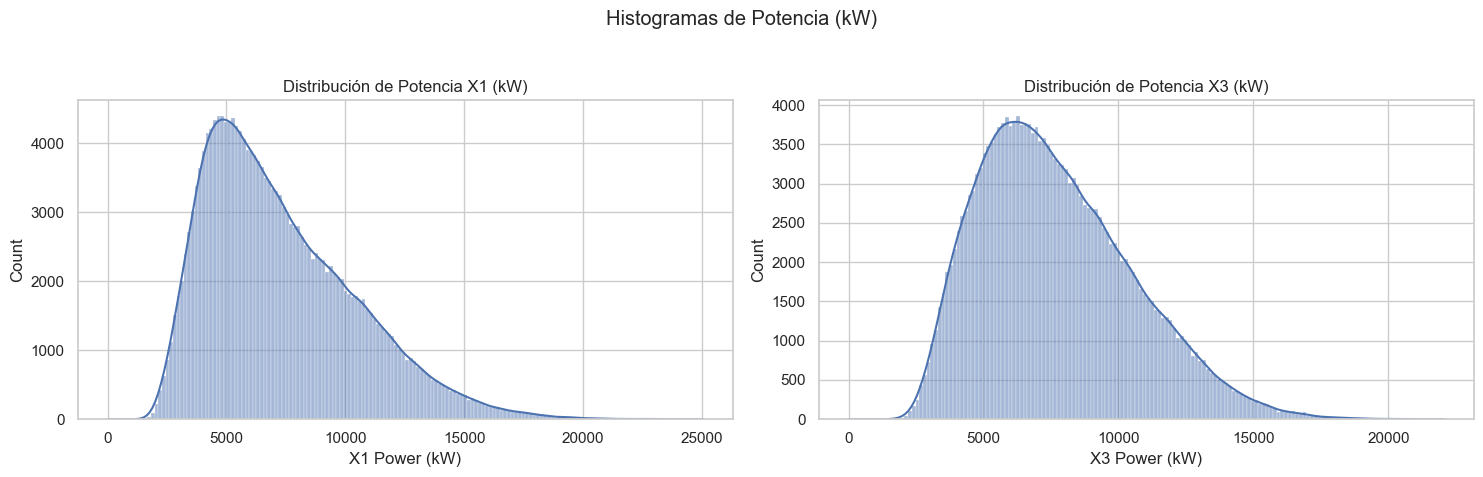

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histogramas de Potencia (kW)')

sns.histplot(df['X1 Power (kW)'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Potencia X1 (kW)')

sns.histplot(df['X3 Power (kW)'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de Potencia X3 (kW)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Interrupciones de servicio

A continuación se extraen los datos de las interrupciones encontradas, estas interrupciones afectaron a todos los clientes conectados al transformador. 

In [38]:
voltaje_nominal = 120  # o 230, según tu sistema
umbral_corte = voltaje_nominal * 0.9

# Caídas de voltaje en cualquiera de las fases
df['min_voltage'] = df[['X1 Voltage', 'X3 Voltage']].min(axis=1)
df['interrupcion'] = df['min_voltage'] < umbral_corte

total_interrupciones = df['interrupcion'].sum()
print(f"Total de interrupciones detectadas: {total_interrupciones}")

interrupciones = df[df['interrupcion']][['Date', 'X1 Voltage', 'X3 Voltage']]
print(interrupciones)


Total de interrupciones detectadas: 3
                       Date  X1 Voltage  X3 Voltage
22888   2025-02-02 07:28:34         0.2         0.2
143263  2025-01-23 18:48:09         0.3         0.3
149978  2025-02-02 07:28:19         5.6         5.7


## Box Plots para Identificar Outliers
Usamos box plots para visualizar la dispersión de los datos y detectar posibles valores atípicos.

En este caso, los valores atipicos nos indican y confirman el listado de las interrupciones del bloque anterior.

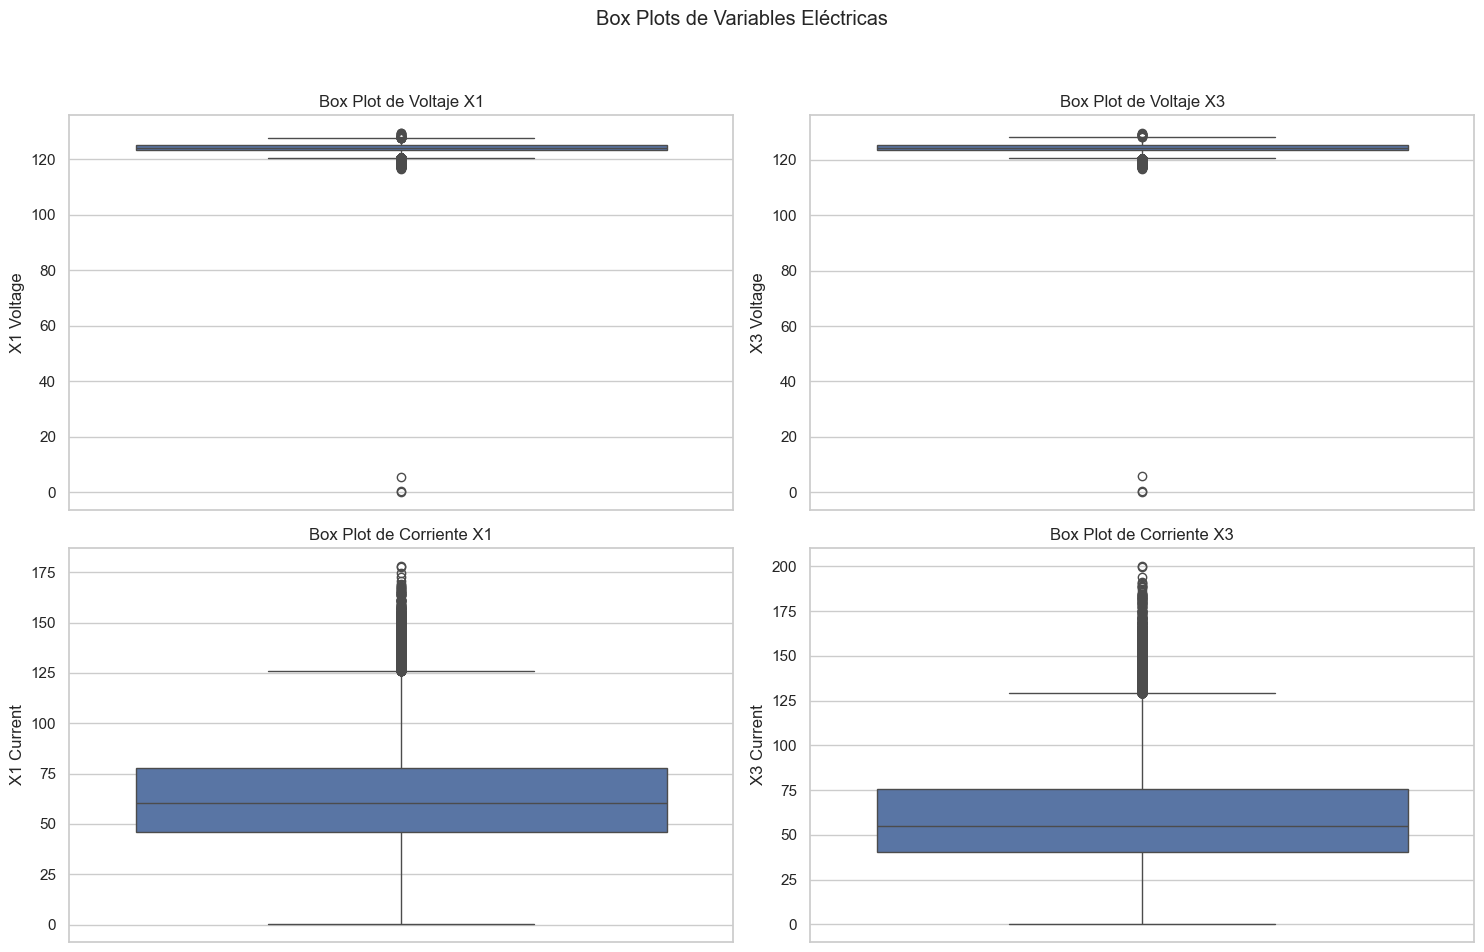

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Box Plots de Variables Eléctricas')

sns.boxplot(y=df['X1 Voltage'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot de Voltaje X1')

sns.boxplot(y=df['X3 Voltage'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot de Voltaje X3')

sns.boxplot(y=df['X1 Current'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot de Corriente X1')

sns.boxplot(y=df['X3 Current'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot de Corriente X3')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Gráficos de Series Temporales
Visualizamos cómo cambian el voltaje y la corriente a lo largo del tiempo.

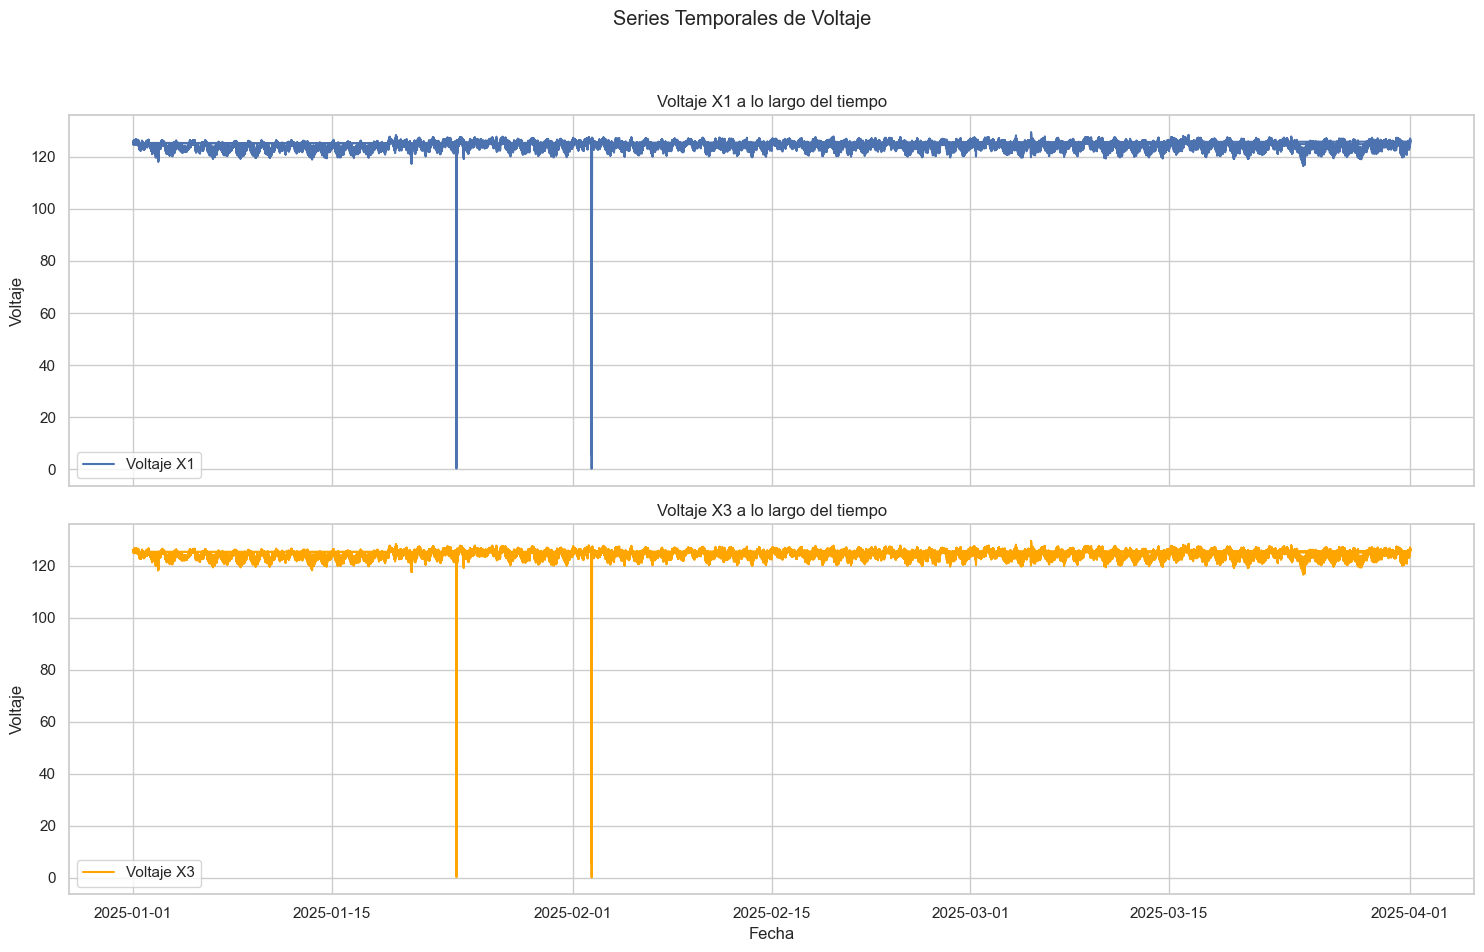

In [18]:
# Asegurarse de que 'Date' es el índice para facilitar el ploteo de series temporales
df_ts = df.set_index('Date')

fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
fig.suptitle('Series Temporales de Voltaje')

axes[0].plot(df_ts.index, df_ts['X1 Voltage'], label='Voltaje X1')
axes[0].set_ylabel('Voltaje')
axes[0].legend()
axes[0].set_title('Voltaje X1 a lo largo del tiempo')

axes[1].plot(df_ts.index, df_ts['X3 Voltage'], label='Voltaje X3', color='orange')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Voltaje')
axes[1].legend()
axes[1].set_title('Voltaje X3 a lo largo del tiempo')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

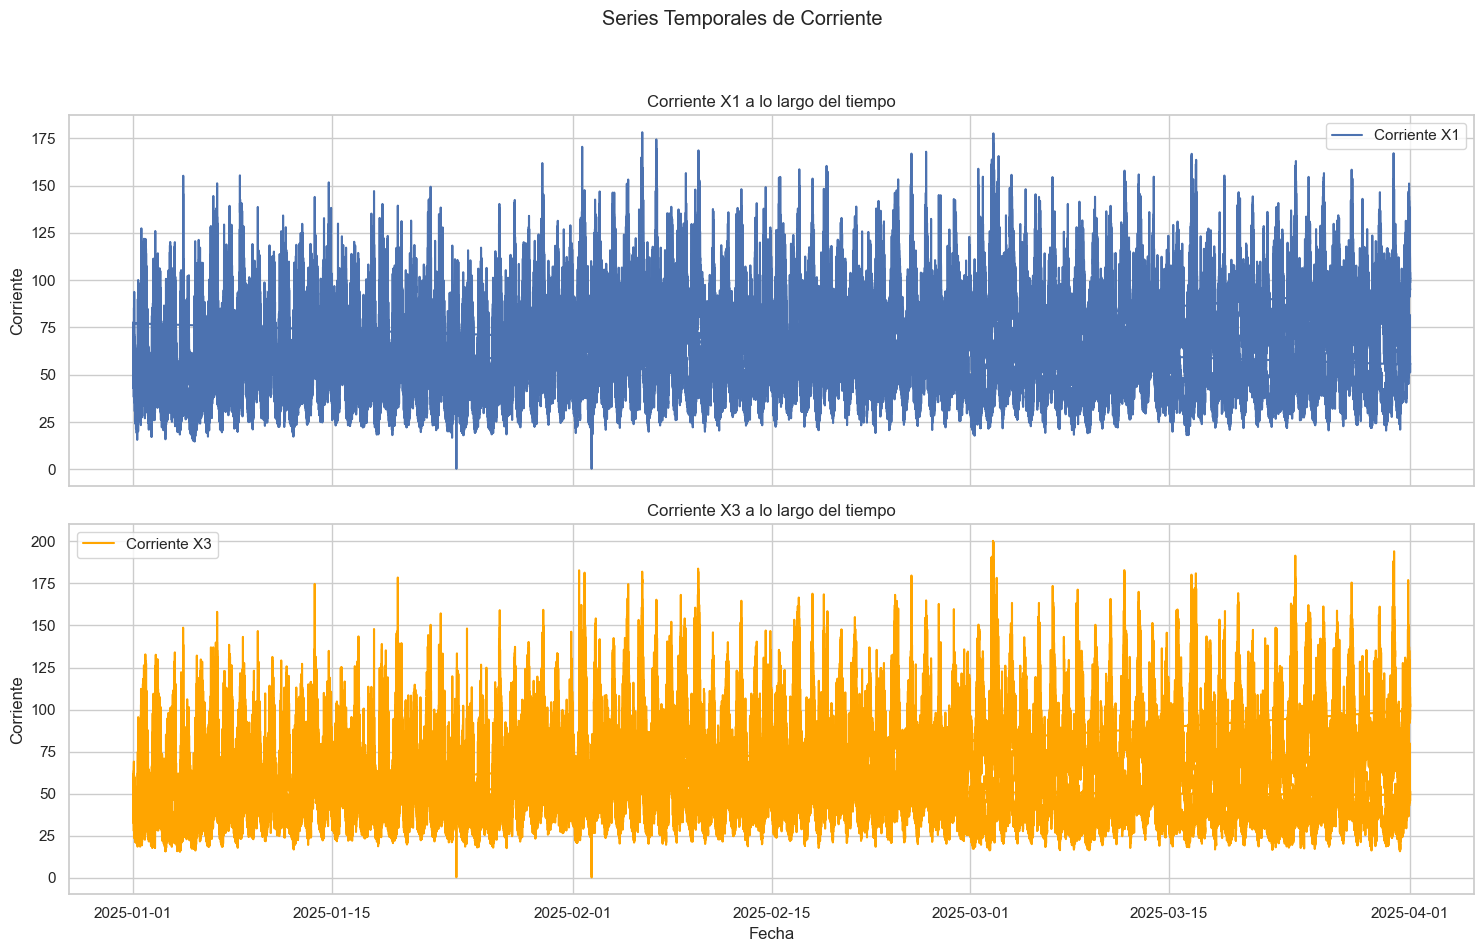

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
fig.suptitle('Series Temporales de Corriente')

axes[0].plot(df_ts.index, df_ts['X1 Current'], label='Corriente X1')
axes[0].set_ylabel('Corriente')
axes[0].legend()
axes[0].set_title('Corriente X1 a lo largo del tiempo')

axes[1].plot(df_ts.index, df_ts['X3 Current'], label='Corriente X3', color='orange')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Corriente')
axes[1].legend()
axes[1].set_title('Corriente X3 a lo largo del tiempo')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

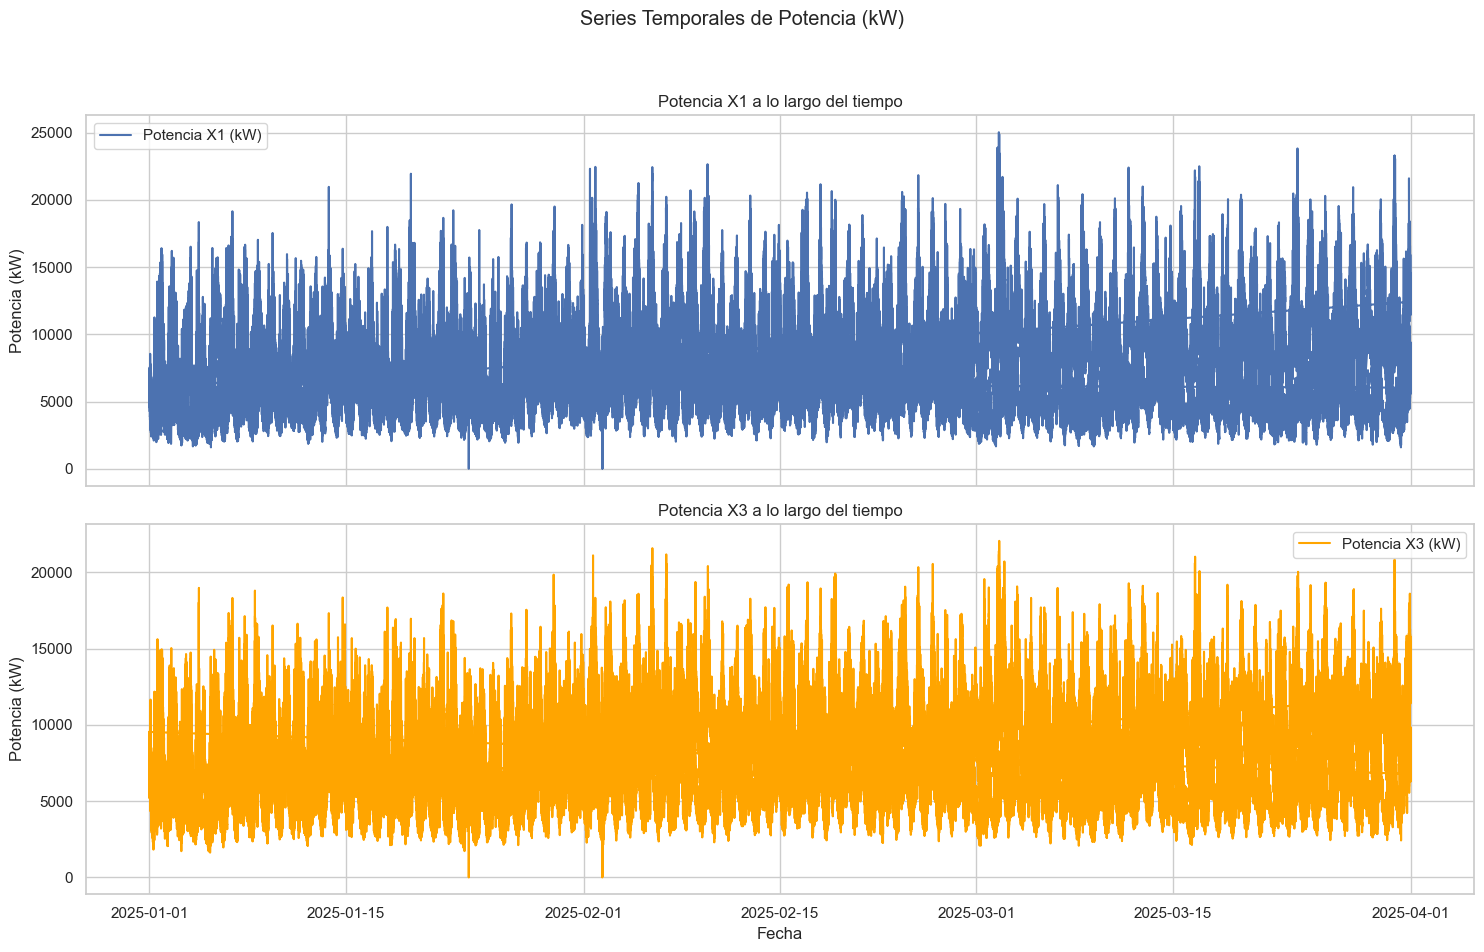

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
fig.suptitle('Series Temporales de Potencia (kW)')

axes[0].plot(df_ts.index, df_ts['X1 Power (kW)'], label='Potencia X1 (kW)')
axes[0].set_ylabel('Potencia (kW)')
axes[0].legend()
axes[0].set_title('Potencia X1 a lo largo del tiempo')

axes[1].plot(df_ts.index, df_ts['X3 Power (kW)'], label='Potencia X3 (kW)', color='orange')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Potencia (kW)')
axes[1].legend()
axes[1].set_title('Potencia X3 a lo largo del tiempo')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

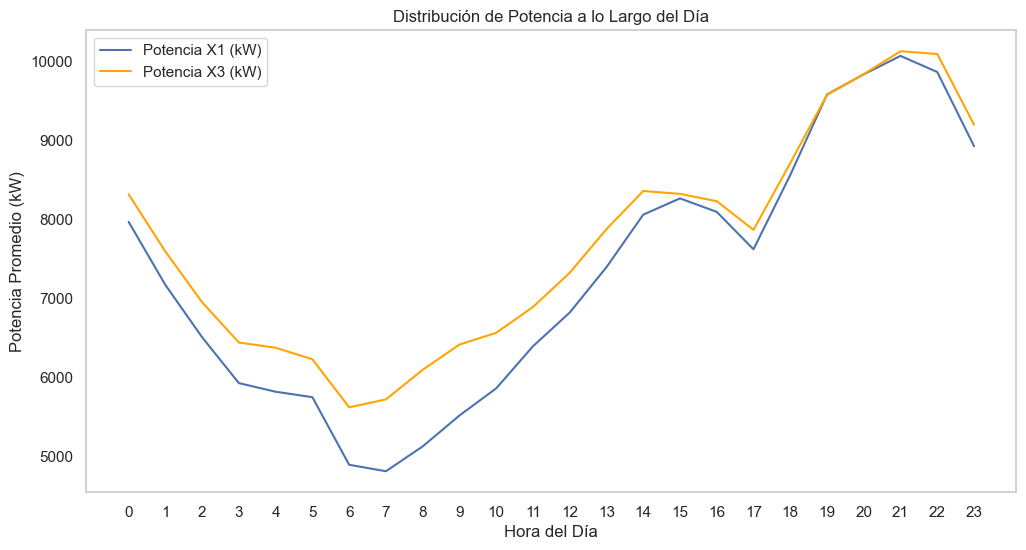

In [21]:
# Extraer la hora de la columna 'Date'
df_ts['Hour'] = df_ts.index.hour

# Calcular la potencia promedio por hora
power_distribution = df_ts.groupby('Hour')[['X1 Power (kW)', 'X3 Power (kW)']].mean()

# Graficar la distribución de potencia a lo largo del día
plt.figure(figsize=(12, 6))
plt.plot(power_distribution.index, power_distribution['X1 Power (kW)'], label='Potencia X1 (kW)')
plt.plot(power_distribution.index, power_distribution['X3 Power (kW)'], label='Potencia X3 (kW)', color='orange')
plt.title('Distribución de Potencia a lo Largo del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Potencia Promedio (kW)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid()
plt.show()

# CURVA ITIC

- La curva ITIC (Information Technology Industry Council) es un estándar gráfico utilizado para evaluar la tolerancia de equipos electrónicos y sistemas eléctricos sensibles frente a variaciones de tensión (voltaje) en función del tiempo.

## USO DE LA CURVA EN ESTE CASO

- En este caso, la curva nos ayuda a encontrar cuáles fueron los registros que se encontrar fuera del valor de tolerancia indicado. Con esto, podemos solicitar un mantenimiento o un análisi físico más detallado del equipo.

## CÓMO SE INTERPRETA?

- El eje X (logaritmico): representa la duración del intervalo en segundos
- El eje Y:  muestra el voltaje como porcentaje del valor nominal

Todos los registros dentro de la zona verde se interpretan como dentro de rango, es decir, dentro de tolerancia, los que están fuera son los equipos que podrían causar problemas de funcionamiento.


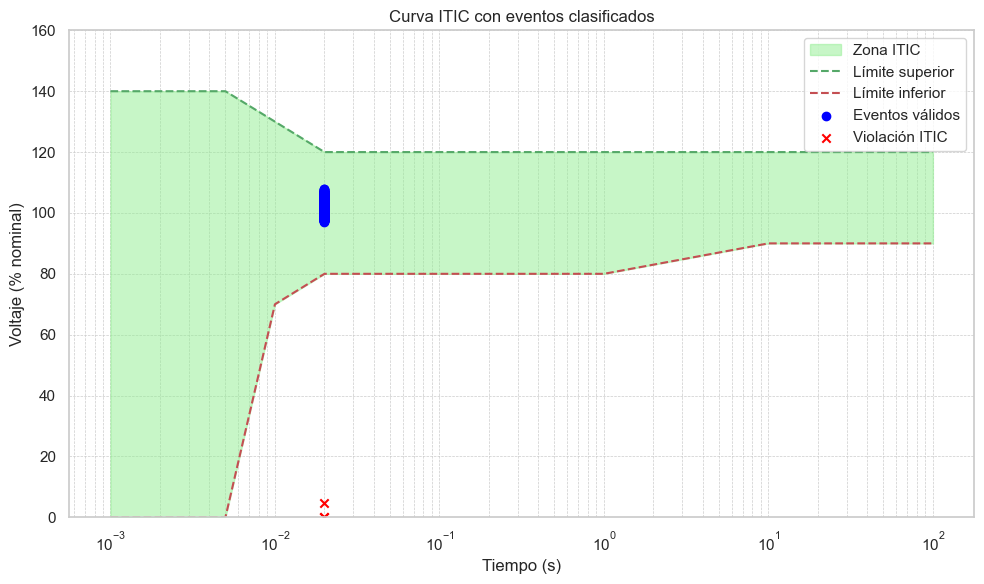

clasificacion_ITIC
Dentro de ITIC    191065
Violación ITIC         3
Name: count, dtype: int64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# DEFINIR VOLTAJE NOMINAL
voltaje_nominal = 120  # Ajusta a 230 si aplica a tu sistema

# PREPARAR EVENTOS
df_eventos = df.copy()

# Calcular voltaje mínimo entre X1 y X3 como % del nominal
df_eventos['voltaje_porcentual'] = df_eventos[['X1 Voltage', 'X3 Voltage']].min(axis=1) / voltaje_nominal * 100

# Asignar duración genérica (20 ms por evento)
df_eventos['duracion'] = 0.02  # en segundos

# ---------- PARTE 3: FUNCIONES ITIC ----------

def itic_limite_superior(t):
    if t <= 0.005:
        return 140
    elif t <= 0.02:
        return 140 - ((140 - 120) / (0.02 - 0.005)) * (t - 0.005)
    else:
        return 120

def itic_limite_inferior(t):
    if t <= 0.005:
        return 0
    elif t <= 0.01:
        return 70 + (10_000 * (t - 0.005))  # lineal
    elif t <= 0.5:
        return 80
    elif t <= 10:
        return 80 + ((90 - 80) / (10 - 0.5)) * (t - 0.5)
    else:
        return 90

def clasificar_evento(t, v):
    sup = itic_limite_superior(t)
    inf = itic_limite_inferior(t)
    if v > sup or v < inf:
        return 'Violación ITIC'
    else:
        return 'Dentro de ITIC'

# Clasificar eventos
df_eventos['clasificacion_ITIC'] = df_eventos.apply(
    lambda row: clasificar_evento(row['duracion'], row['voltaje_porcentual']), axis=1
)

# GRAFICAR CURVA Y EVENTOS
# Curva ITIC
x = [0.001, 0.005, 0.01, 0.02, 0.1, 0.5, 1, 10, 100]
upper_limit = [140, 140, 130, 120, 120, 120, 120, 120, 120]
lower_limit = [0, 0, 70, 80, 80, 80, 80, 90, 90]

plt.figure(figsize=(10, 6))
plt.fill_between(x, lower_limit, upper_limit, color='lightgreen', alpha=0.5, label='Zona ITIC')
plt.plot(x, upper_limit, 'g--', label='Límite superior')
plt.plot(x, lower_limit, 'r--', label='Límite inferior')

# Separar eventos
df_dentro = df_eventos[df_eventos['clasificacion_ITIC'] == 'Dentro de ITIC']
df_fuera = df_eventos[df_eventos['clasificacion_ITIC'] == 'Violación ITIC']

plt.scatter(df_dentro['duracion'], df_dentro['voltaje_porcentual'], color='blue', label='Eventos válidos')
plt.scatter(df_fuera['duracion'], df_fuera['voltaje_porcentual'], color='red', label='Violación ITIC', marker='x')

plt.xscale('log')
plt.ylim(0, 160)
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (% nominal)")
plt.title("Curva ITIC con eventos clasificados")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


#resumen
# Contar eventos por clasificación
cuenta_clasificaciones = df_eventos['clasificacion_ITIC'].value_counts()
print(cuenta_clasificaciones)


In [32]:
df['sobrecarga'] = df['kVA'] > df['kVA Rating']
# Porcentaje de eventos con sobrecarga
porcentaje_sobrecarga = df['sobrecarga'].mean() * 100
print(f"Porcentaje de sobrecargas: {porcentaje_sobrecarga:.2f}%")
df['factor_carga'] = df['kVA'] / df['kVA Rating']
resumen = df.groupby('ID')[['kVA', 'kVA Rating', 'factor_carga']].mean()
print(resumen.sort_values('factor_carga', ascending=False))
total_sobrecargados = df['sobrecarga'].sum()
print(f"Transformadores sobrecargados: {total_sobrecargados} de {len(df)}")




Porcentaje de sobrecargas: 0.00%
          kVA  kVA Rating  factor_carga
ID                                     
7   10.788629        50.0      0.215773
10  17.613056       100.0      0.176131
3   17.543521       100.0      0.175435
Transformadores sobrecargados: 0 de 191068


## DIMENSIONAMIENTO DE TRANSFORMADORES

Al validar en el gráfico del uso de los transformadores, encontramos que estos están en un nivel óptimo de escalamiento para la carga actual, ya que, ninguno cruza el umbral de alto uso.

Estos umbrales están definidos de la siguiente manera:
 - Rojo: Sobrecarga
 - Naranja: Carga Alta
 - Azul: Moderado
 - Gris: Normal

/var/folders/qx/6h_px6s158j48rpptv4w038h0000gp/T/ipykernel_13341/2933943038.py:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/anaconda3/envs/cursods/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


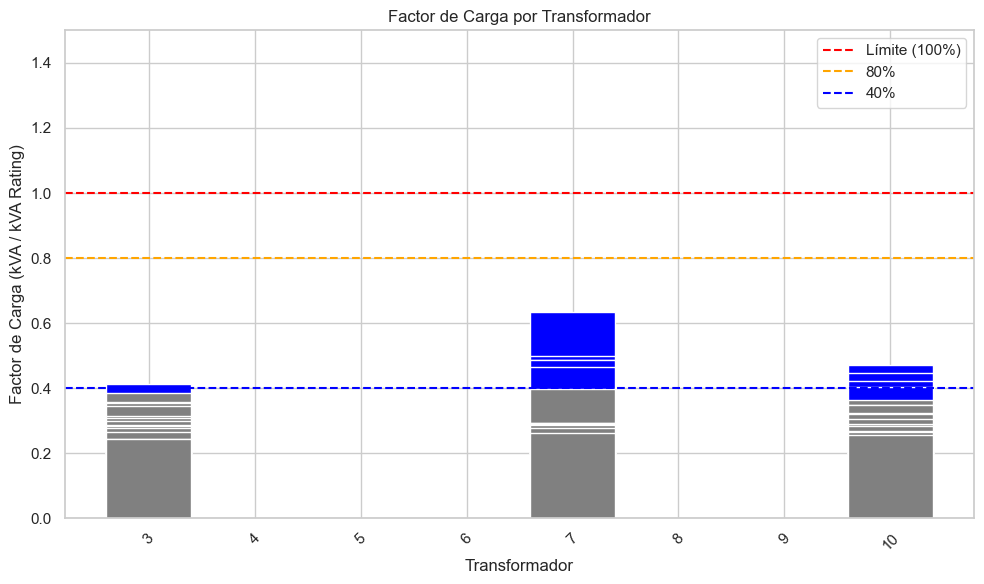

In [36]:
import matplotlib.pyplot as plt

# Calcular factor de carga
df['factor_carga'] = df['kVA'] / df['kVA Rating']

# Clasificar uso
def clasificar_carga(fc):
    if fc > 1:
        return 'Sobrecarga'
    elif fc >= 0.8:
        return 'Alto uso'
    elif fc >= 0.4:
        return 'Uso moderado'
    else:
        return 'Normal'

df['clasificacion'] = df['factor_carga'].apply(clasificar_carga)

# Dibujar gráfico
plt.figure(figsize=(10, 6))
colors = df['clasificacion'].map({
    'Sobrecarga': 'red',
    'Alto uso': 'orange',
    'Uso moderado': 'blue',
    'Normal': 'gray'
})

plt.bar(df['ID'], df['factor_carga'], color=colors)
plt.axhline(1.0, color='red', linestyle='--', label='Límite (100%)')
plt.axhline(0.8, color='orange', linestyle='--', label='80%')
plt.axhline(0.4, color='blue', linestyle='--', label='40%')
plt.title("Factor de Carga por Transformador")
plt.ylabel("Factor de Carga (kVA / kVA Rating)")
plt.xlabel("Transformador")
plt.ylim(0, 1.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
